## Visualize the result

In [545]:
plt.rcParams.update({'font.size': 24, 'font.weight': 'heavy','axes.linewidth':2})

In [381]:
adata_train.obs['batch_TF'] = adata_train.obs['batch']=='1'

In [382]:
adata_train.obs['batch_TF'] = adata_train.obs['batch_TF'].astype('str')

In [421]:
adata_train.obs['True CD45RA Label'] = adata_train.obs['batch_TF'] 

In [461]:
for i in ['linear_svm','rbf_svm','LR','stack','mlp']:
    adata_train.obs[i+' error'] = adata_train.obs['True CD45RA Label'] != adata_train.obs[i]
    adata_train.obs[i+' error'] = adata_train.obs[i+' error'].astype('str')

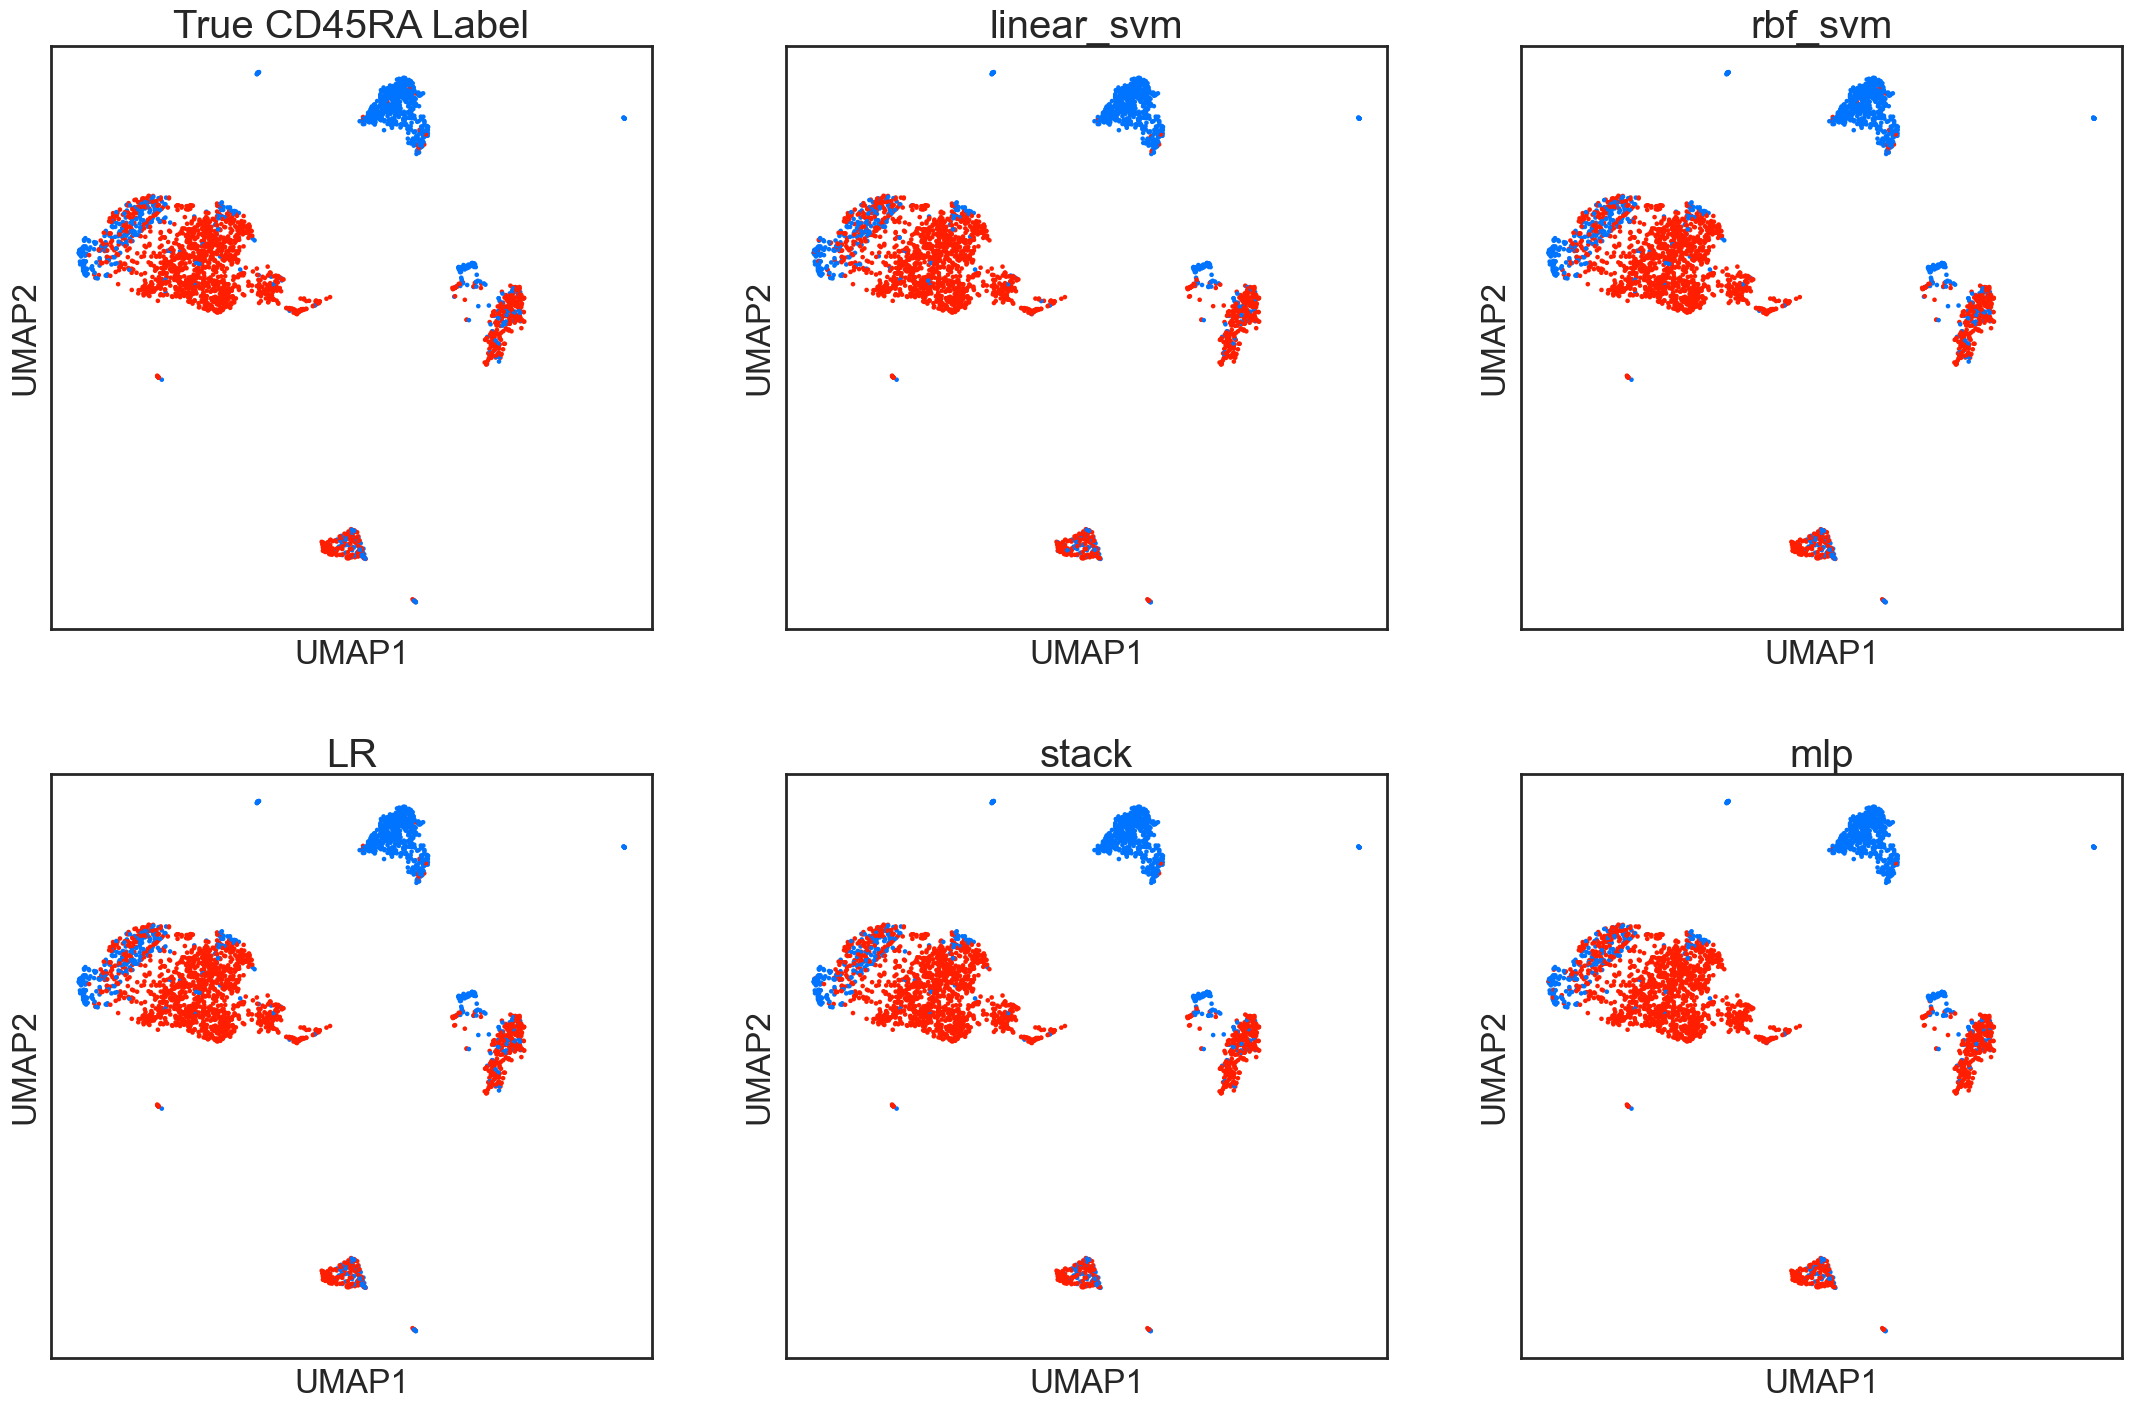

In [469]:
sc.pl.umap(adata_train, color = ['True CD45RA Label','linear_svm','rbf_svm','LR','stack','mlp'],ncols = 3, legend_loc = 'None',cmap = my_cmap,palette = rb_palette, save = 'accuracy_train.png')

In [553]:
bi_palette_2 = ['#E8D2A0','#030200'] 

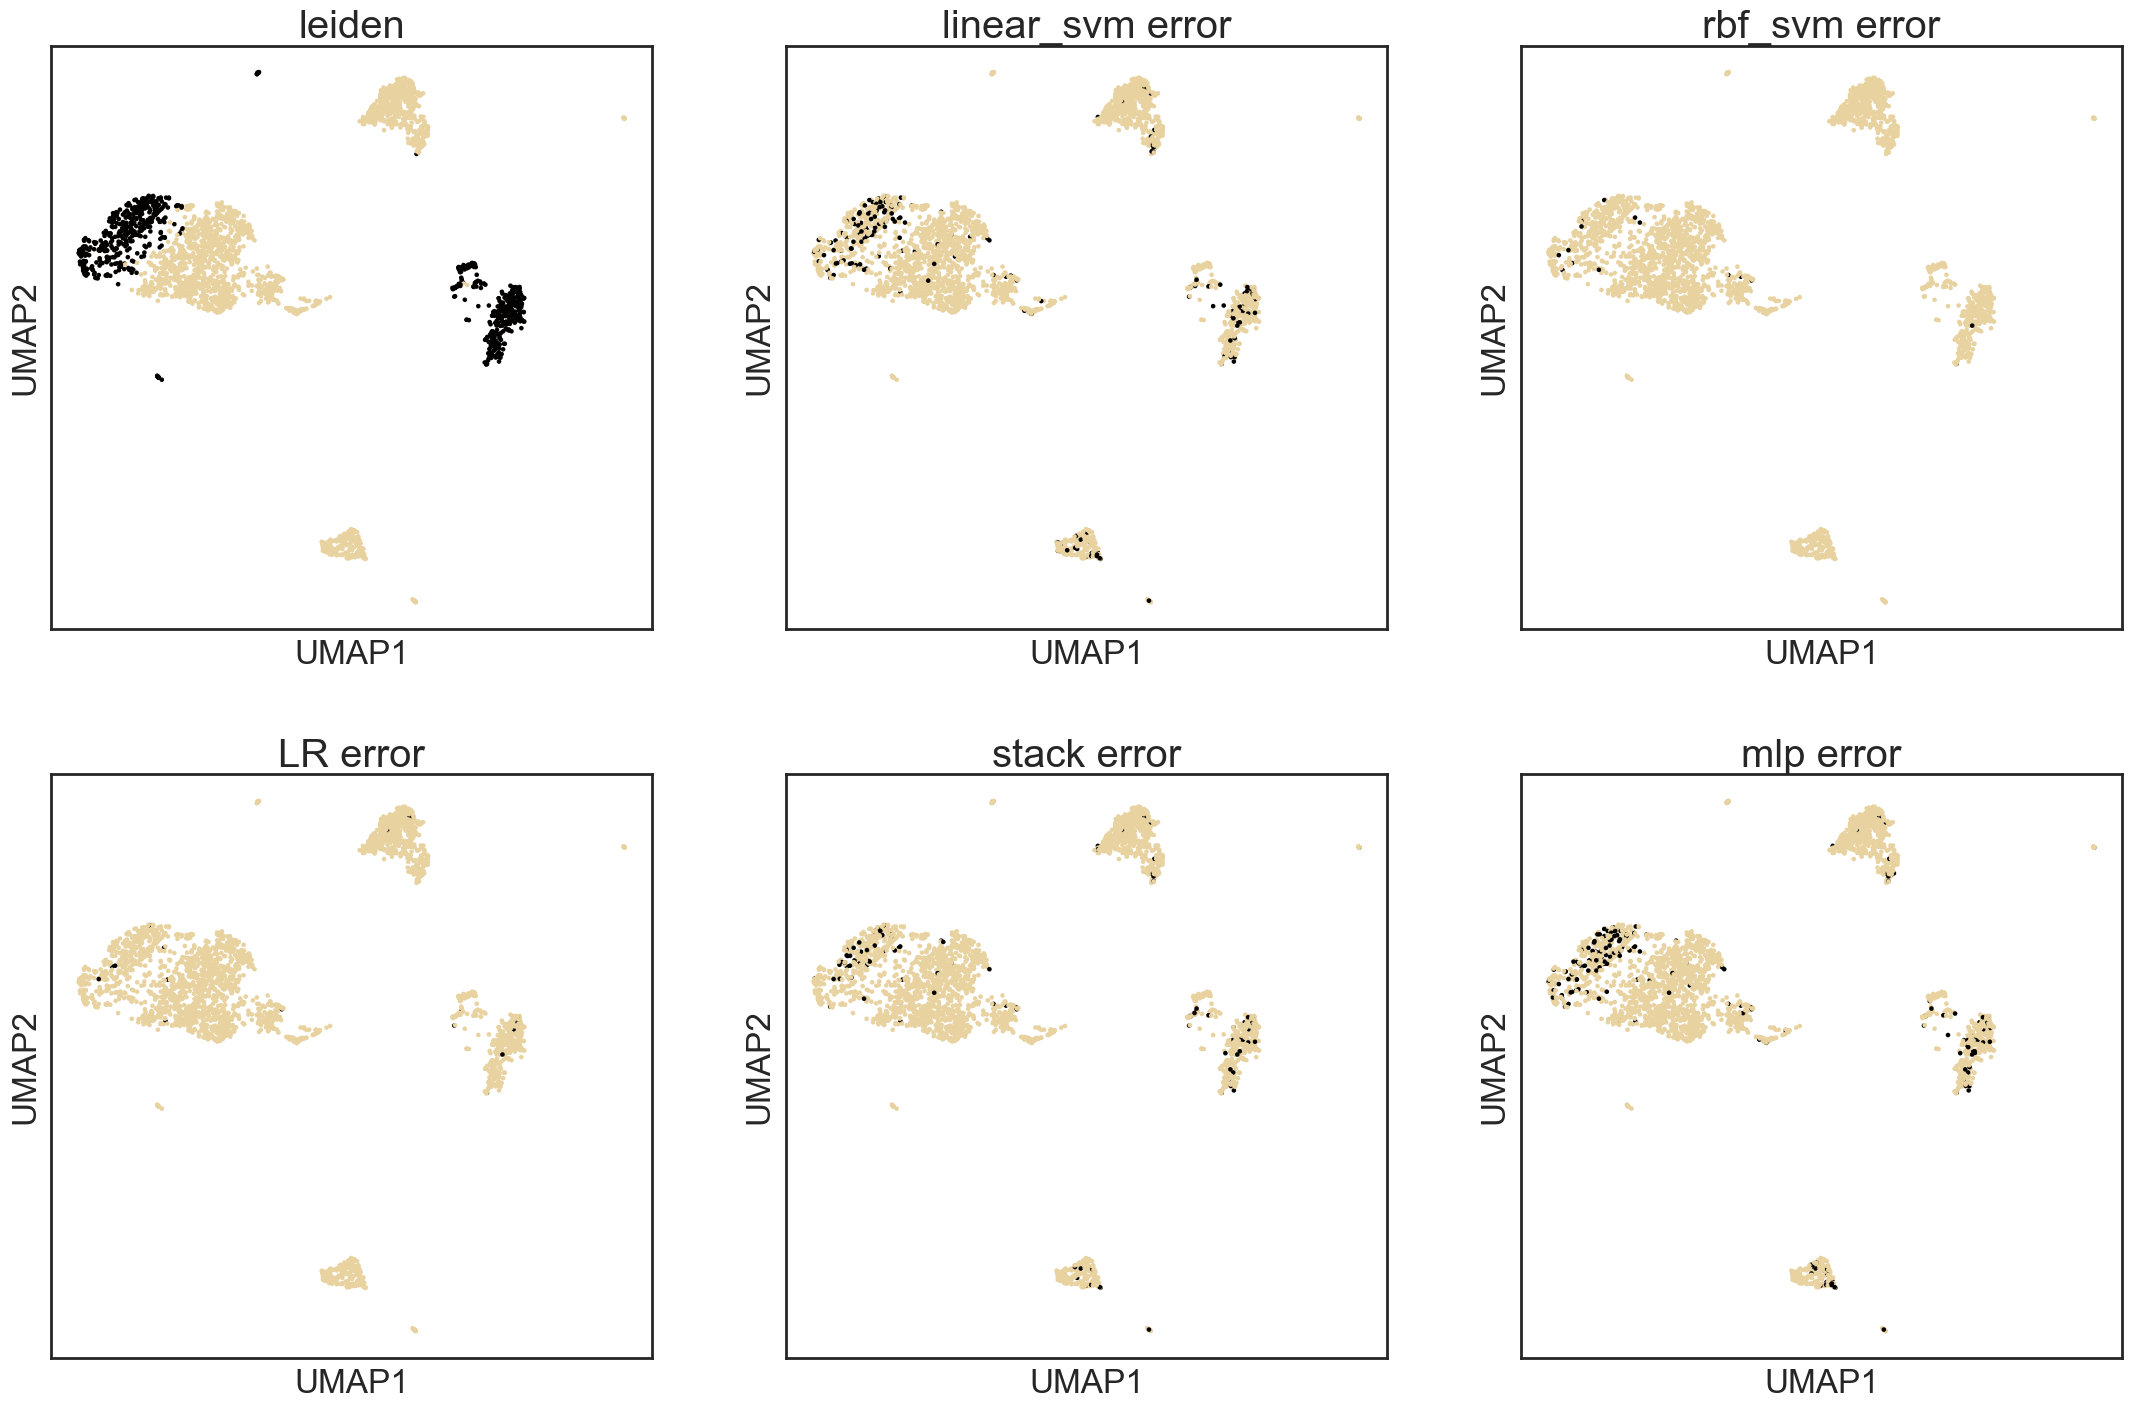

In [554]:
sc.pl.umap(adata_train, color = ['leiden','linear_svm error','rbf_svm error','LR error','stack error','mlp error'],ncols = 3, legend_loc = 'None',cmap = my_cmap,palette = bi_palette_2, save = 'missed_train.png')

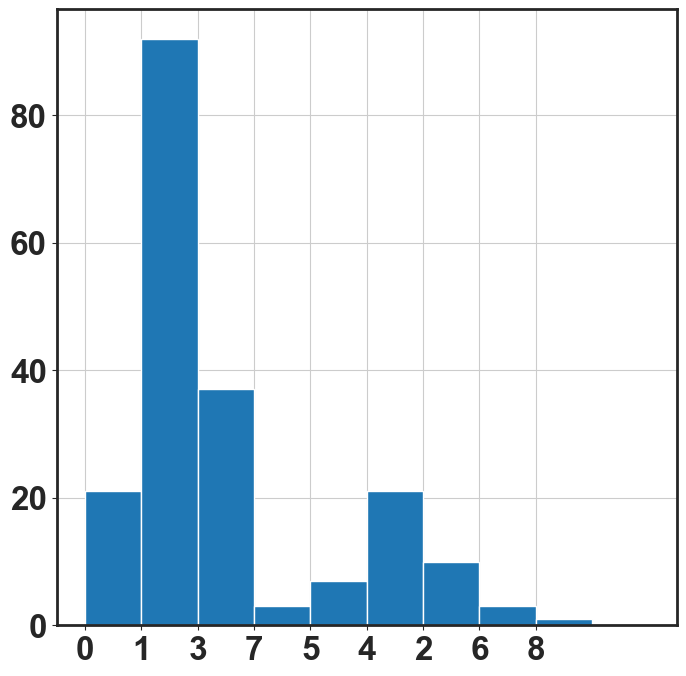

In [563]:
adata_train[adata_train.obs['linear_svm error'] == 'True',:].obs['leiden'].hist(bins= range(len(set(adata_train.obs['leiden']))))
plt.savefig('missed_cluster.png')

In [568]:
for i in ['linear_svm','rbf_svm','LR','stack','mlp']:
    print(np.sum(adata_train[adata_train.obs['leiden'] == '1',:].obs[i+' error'] == 'True')/np.sum(adata_train.obs['leiden'] == '1'))

0.22330097087378642
0.021844660194174758
0.012135922330097087
0.0970873786407767
0.21359223300970873


In [569]:
for i in ['linear_svm','rbf_svm','LR','stack','mlp']:
    print(np.sum(adata_train[adata_train.obs['leiden'] == '3',:].obs[i+' error'] == 'True')/np.sum(adata_train.obs['leiden'] == '3'))

0.12052117263843648
0.006514657980456026
0.019543973941368076
0.0781758957654723
0.11074918566775244


In [364]:
adata_val.obs['batch_TF'] = adata_val.obs['batch']=='1'

In [366]:
adata_val.obs['batch_TF'] = adata_val.obs['batch_TF'].astype('str')

In [424]:
adata_val.obs['True CD45RA Label'] = adata_val.obs['batch_TF'] 

In [572]:
for i in ['linear_svm','rbf_svm','LR','stack','mlp']:
    adata_val.obs[i+' error'] = adata_val.obs['True CD45RA Label'] != adata_val.obs[i]
    adata_val.obs[i+' error'] = adata_val.obs[i+' error'].astype('str')

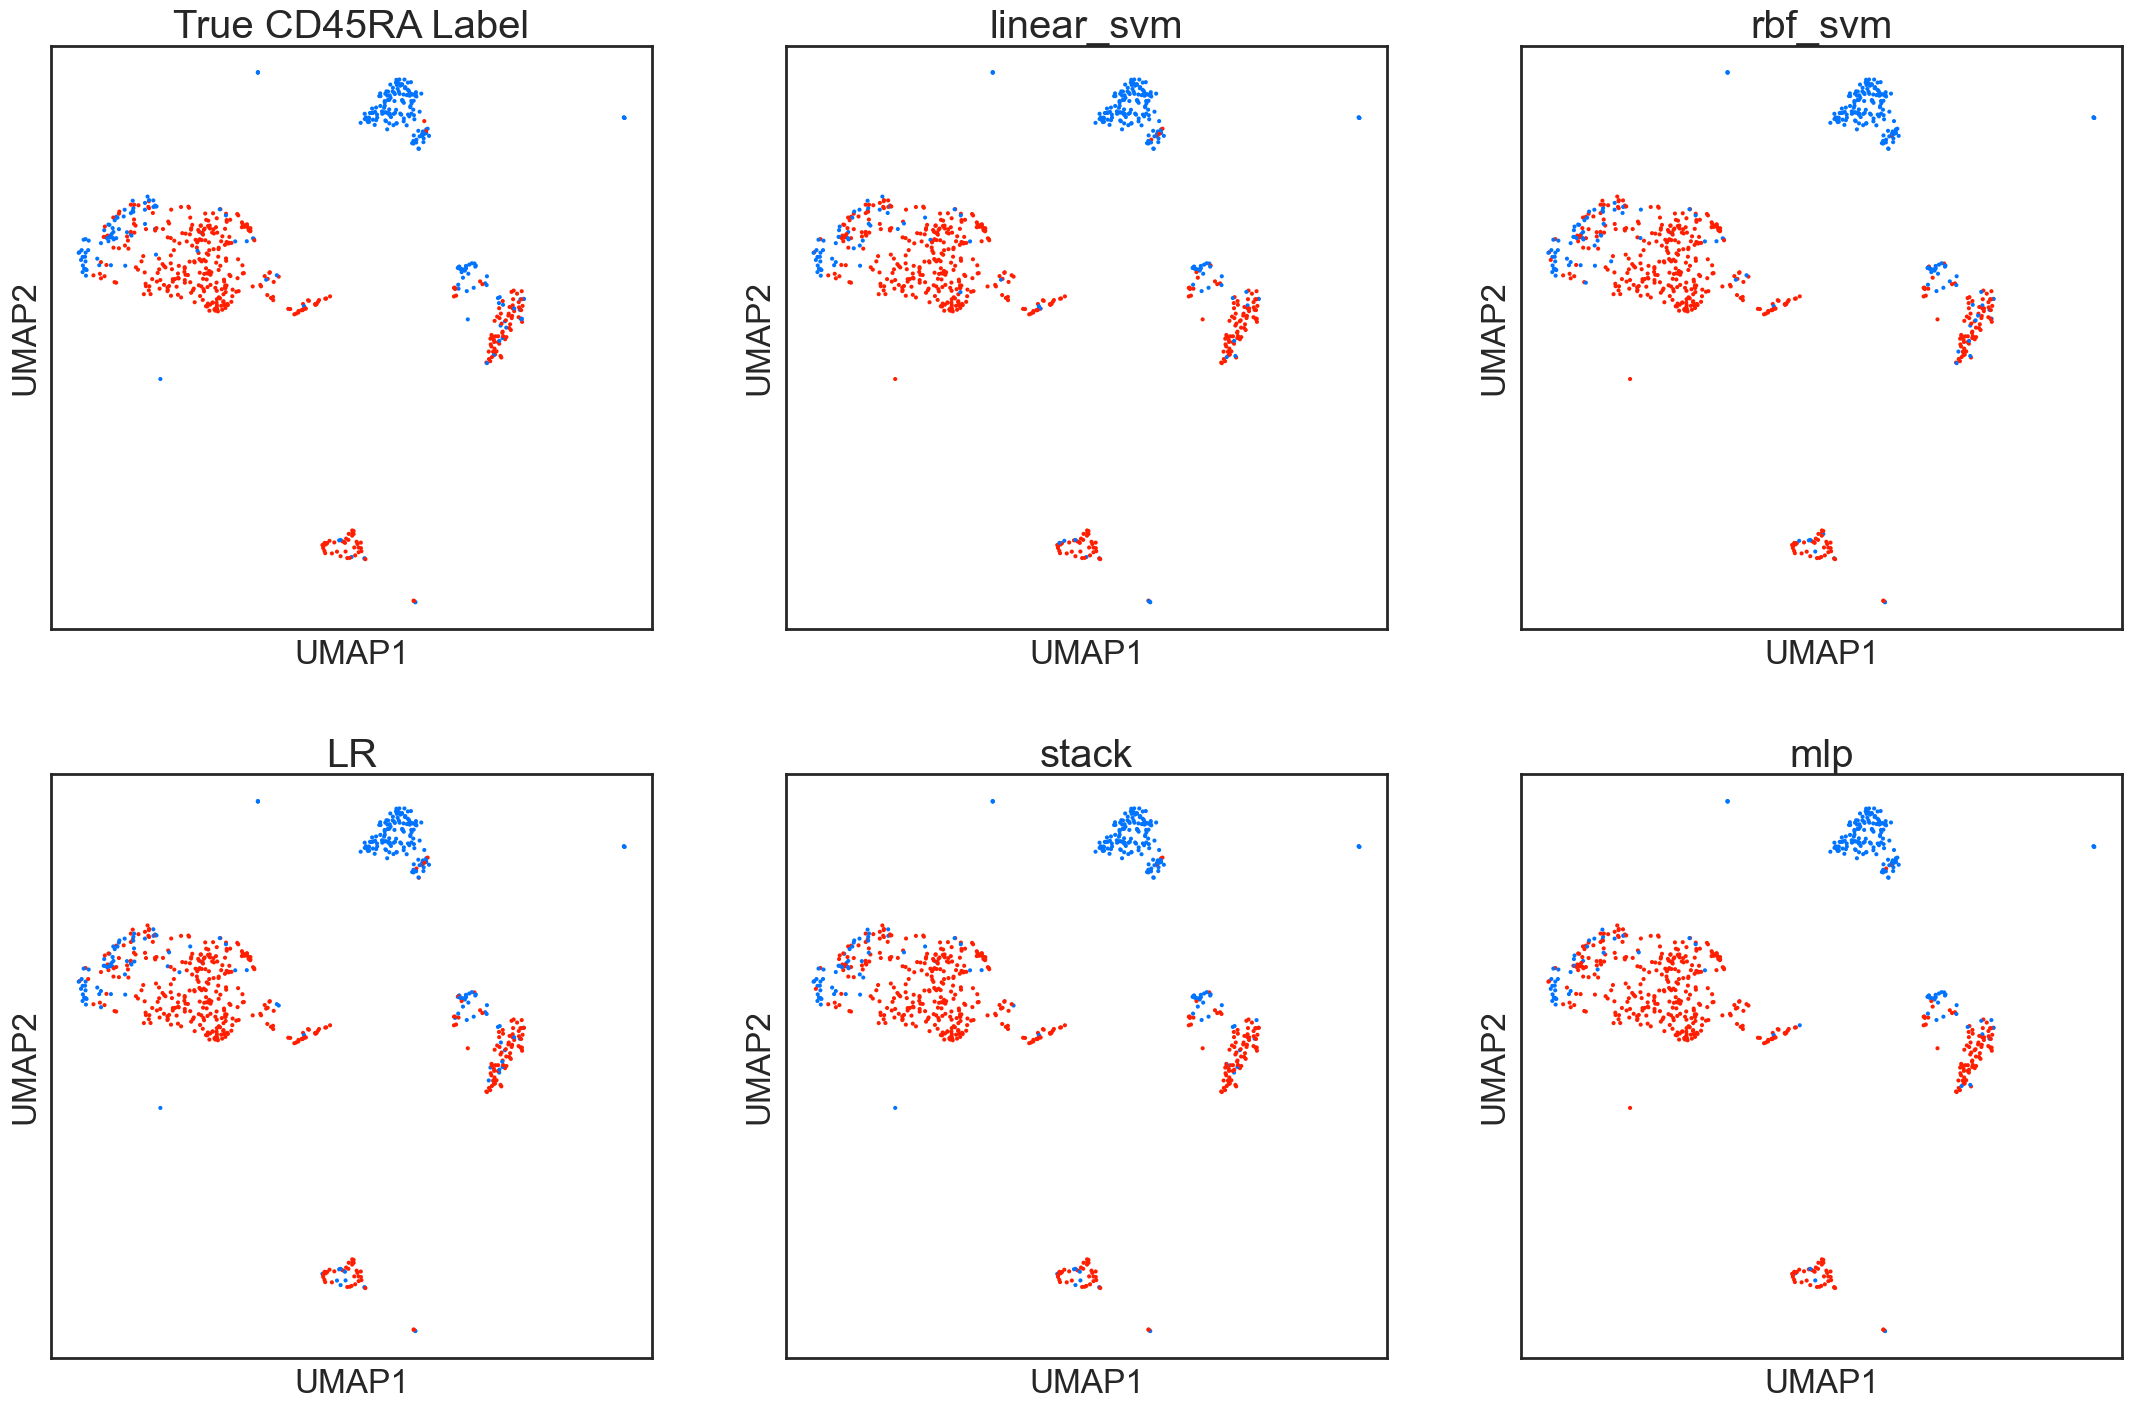

In [472]:
sc.pl.umap(adata_val, color = ['True CD45RA Label','linear_svm','rbf_svm','LR','stack','mlp'],size = 35, ncols = 3, legend_loc = 'None',cmap = my_cmap,palette = rb_palette,save = 'accuracy_test.png')

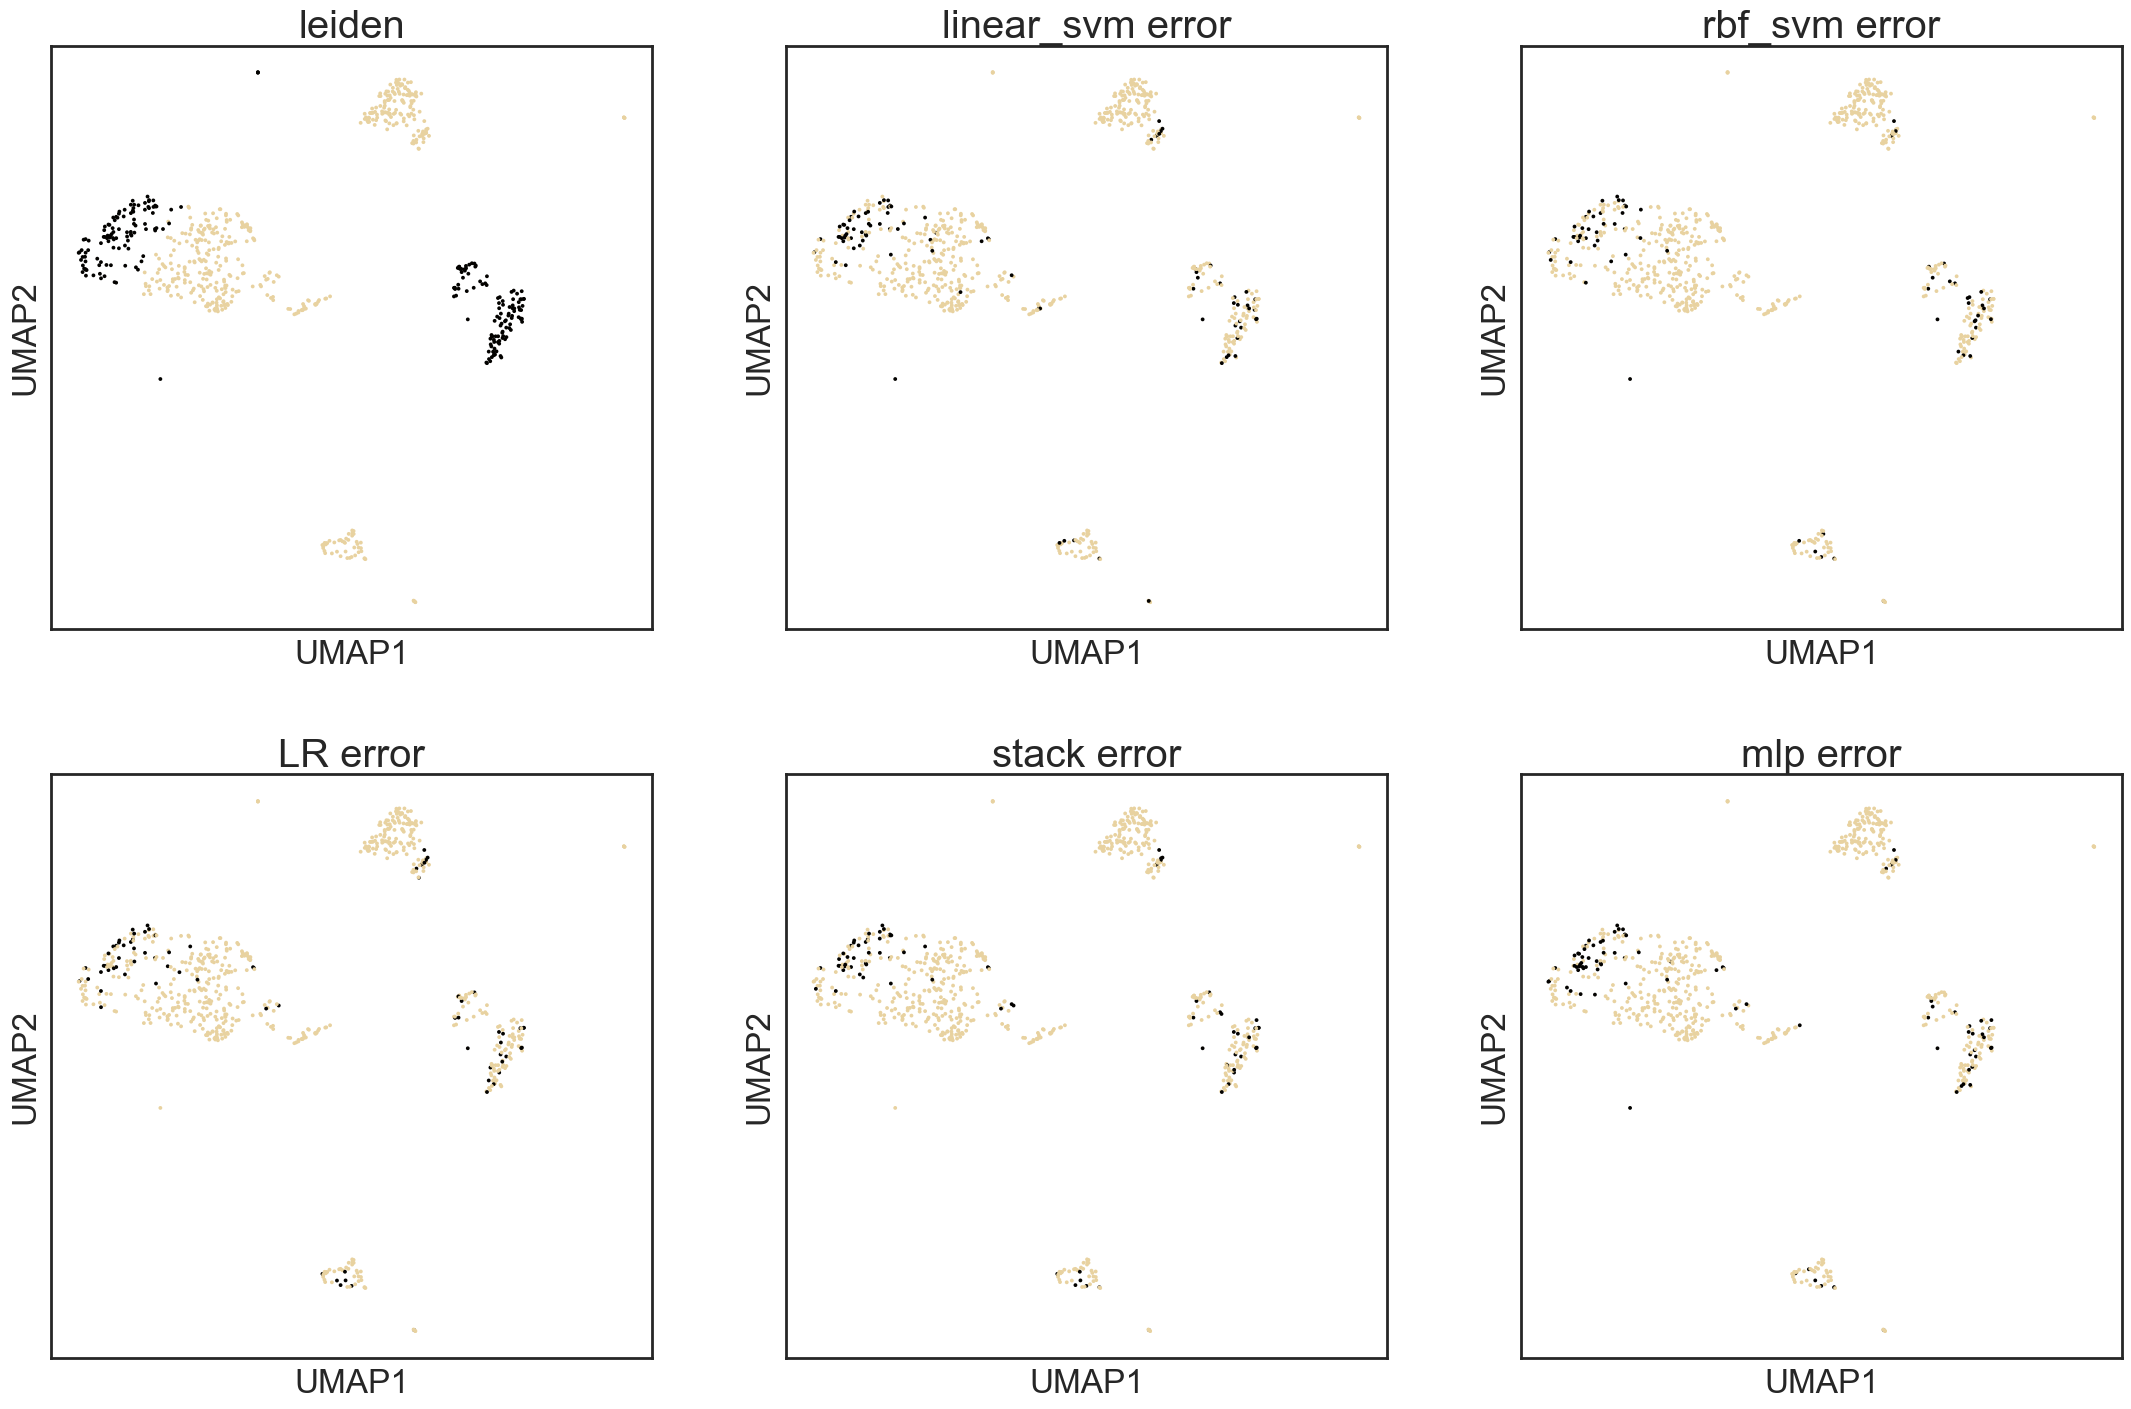

In [ ]:
sc.pl.umap(adata_val, color = ['leiden','linear_svm error','rbf_svm error','LR error','stack error','mlp error'],size = 30,ncols = 3, legend_loc = 'None',cmap = my_cmap,palette = bi_palette_2, save = 'missed_test.png')

In [576]:
for i in ['linear_svm','rbf_svm','LR','stack','mlp']:
    print(np.sum(adata_val[adata_val.obs['leiden'] == '1',:].obs[i+' error'] == 'True')/np.sum(adata_val.obs['leiden'] == '1'))

0.39622641509433965
0.3113207547169811
0.3018867924528302
0.330188679245283
0.3867924528301887


In [577]:
for i in ['linear_svm','rbf_svm','LR','stack','mlp']:
    print(np.sum(adata_val[adata_val.obs['leiden'] == '3',:].obs[i+' error'] == 'True')/np.sum(adata_val.obs['leiden'] == '3'))

0.22727272727272727
0.2159090909090909
0.19318181818181818
0.2159090909090909
0.23863636363636365


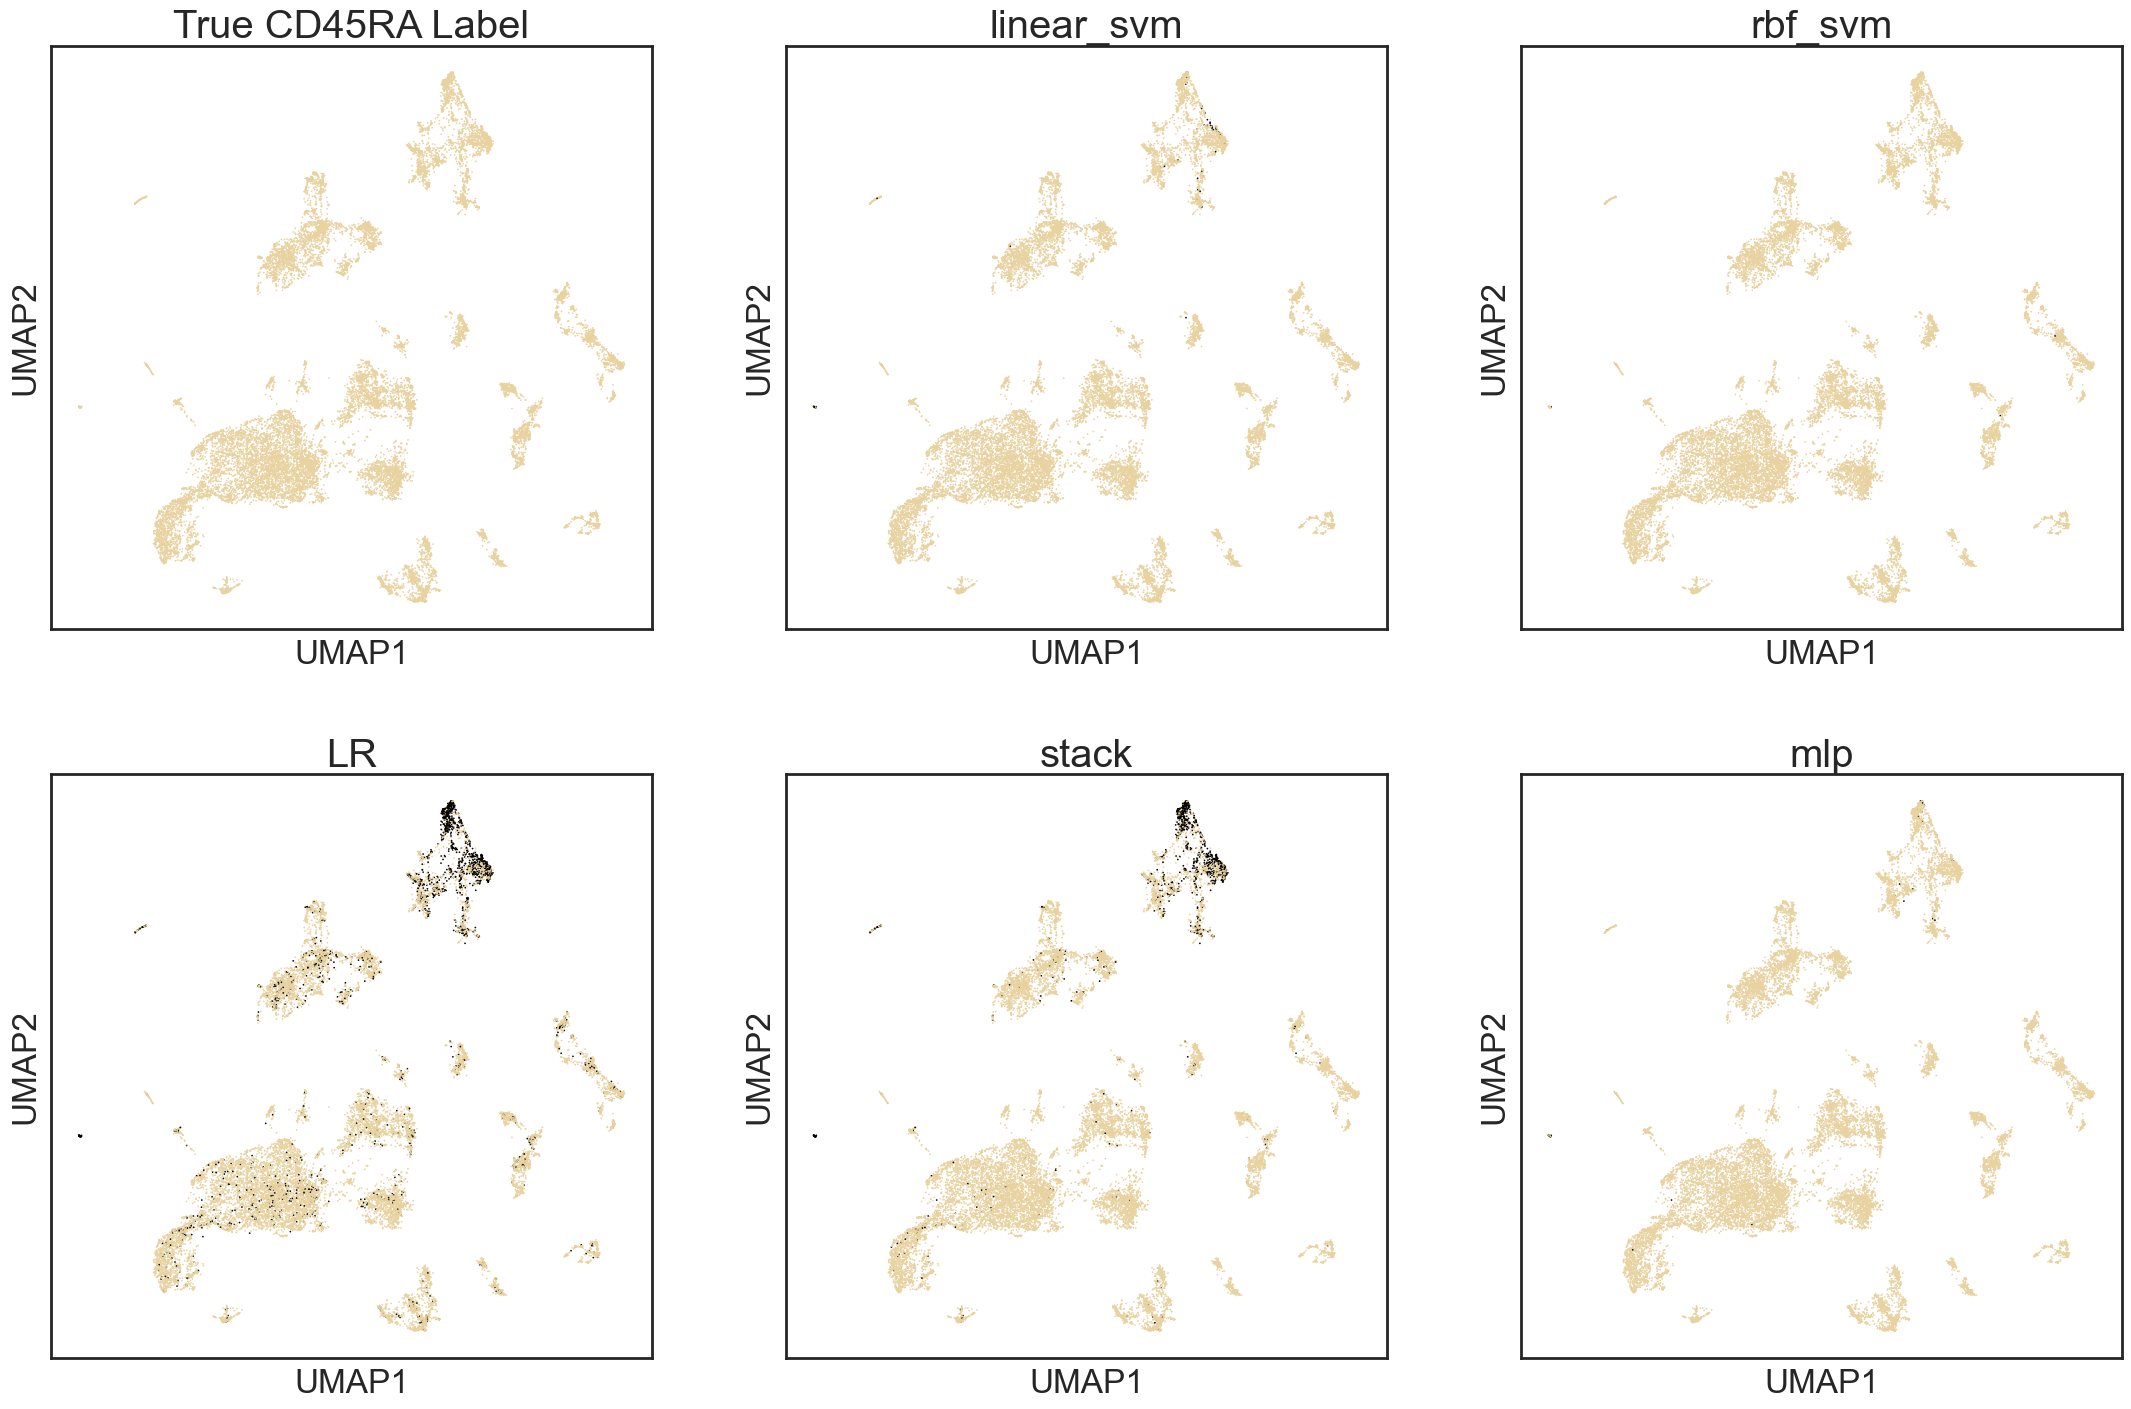

In [426]:
adata_unseen.obs['True CD45RA Label'] = np.zeros([cd45raneg_df.shape[0],1])==1
adata_unseen.obs['True CD45RA Label'] = adata_unseen.obs['True CD45RA Label'].astype('str')
sc.pl.umap(adata_unseen, color = ['True CD45RA Label','linear_svm','rbf_svm','LR','stack','mlp'],ncols = 3, legend_loc = 'None',cmap = my_cmap,palette = bi_palette,save = 'accuracy_unseen.png')

In [593]:
for i in ['linear_svm','rbf_svm','LR','stack','mlp']:
    print(np.around(np.sum(adata_unseen[adata_unseen.obs['leiden'] == '5',:].obs[i] == 'True')/np.sum(adata_unseen.obs['leiden'] == '5'),4))
    print(np.around(np.sum(adata_unseen[adata_unseen.obs['leiden'] == '10',:].obs[i] == 'True')/np.sum(adata_unseen.obs['leiden'] == '10'),4))
    print(np.around(np.sum(adata_unseen[adata_unseen.obs['leiden'] == '11',:].obs[i] == 'True')/np.sum(adata_unseen.obs['leiden'] == '11'),4))

0.0338
0.0039
0.0212
0.0
0.0
0.0
0.4757
0.2713
0.7981
0.3652
0.1344
0.7058
0.0082
0.0039
0.025


## Add more biology to this study

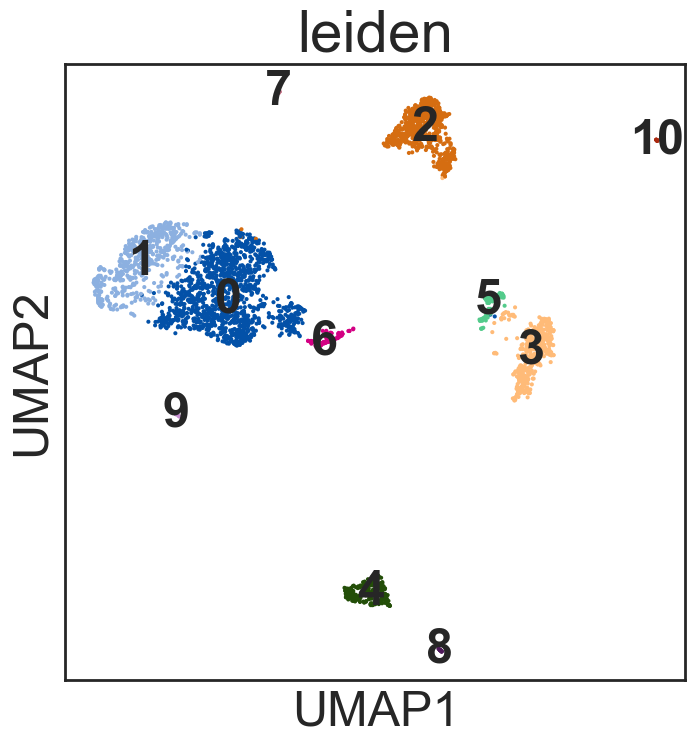

In [617]:
plt.rcParams.update({'font.size': 35, 'font.weight': 'heavy','axes.linewidth':2})
sc.pl.umap(adata_concat, color = ['leiden'],legend_loc = 'on data',ncols = 3,cmap = my_cmap, save = 'CITEcluster.png')

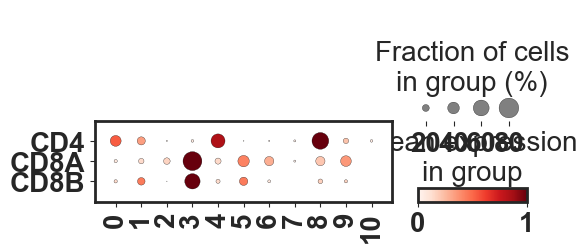

In [483]:
sc.pl.dotplot(adata_concat,['CD4','CD8A','CD8B'], 'leiden', vmax = 1, swap_axes = True, standard_scale = 'var', save = '48.png')

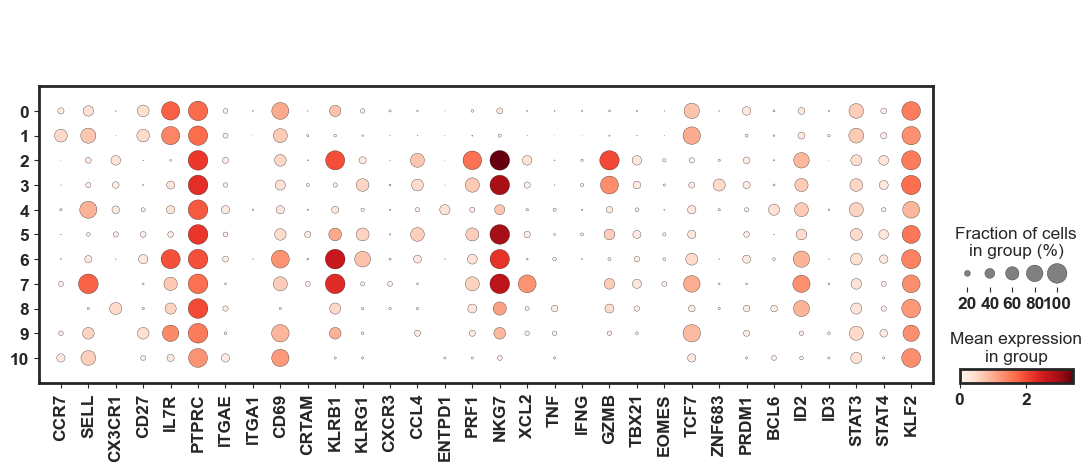

In [537]:
#plt.rcParams.update({'font.size': 15, 'font.weight': 'heavy','axes.linewidth':2})
#plt.rcParams.update(plt.rcParamsDefault)


sc.pl.dotplot(adata_concat,['CCR7','SELL','CX3CR1',
                               'CD27','IL7R','PTPRC','ITGAE','ITGA1','CD69','CRTAM',
                               'KLRB1','KLRG1','CXCR3','CCL4',
                               'ENTPD1','PRF1','NKG7','XCL2','TNF','IFNG','GZMB','TBX21','EOMES','TCF7',
                               'ZNF683','PRDM1','BCL6',
                               'ID2','ID3','STAT3','STAT4','KLF2'],groupby = 'leiden',  
              swap_axes = False,dot_min = 0, save= 'memories.png')

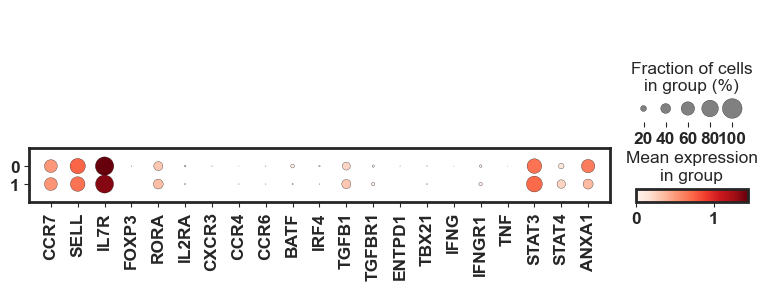

In [525]:
#plt.rcParams.update({'font.size': 15, 'font.weight': 'heavy','axes.linewidth':2})
#plt.rcParams.update(plt.rcParamsDefault)

sc.pl.dotplot(cluster_1,['CCR7','SELL','IL7R','FOXP3','RORA','IL2RA','CXCR3','CCR4','CCR6','BATF',
                     'IRF4','TGFB1','TGFBR1','ENTPD1','TBX21','IFNG','IFNGR1','TNF',
                     'STAT3','STAT4','ANXA1'],groupby = 'leiden' , 
              swap_axes = False,dot_min = 0, save= 'cd4s.png')

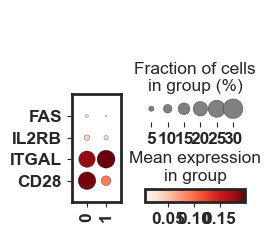

In [523]:
#plt.rcParams.update({'font.size': 15, 'font.weight': 'heavy','axes.linewidth':2})
#plt.rcParams.update(plt.rcParamsDefault)

sc.pl.dotplot(cluster_1,['FAS','IL2RB','ITGAL','CD28'],groupby = 'leiden' , 
              swap_axes = False,dot_min = 0, save= 'cd4s.png')

In [528]:
cluster_3 = adata_concat[adata_concat.obs['leiden']=='3',:]

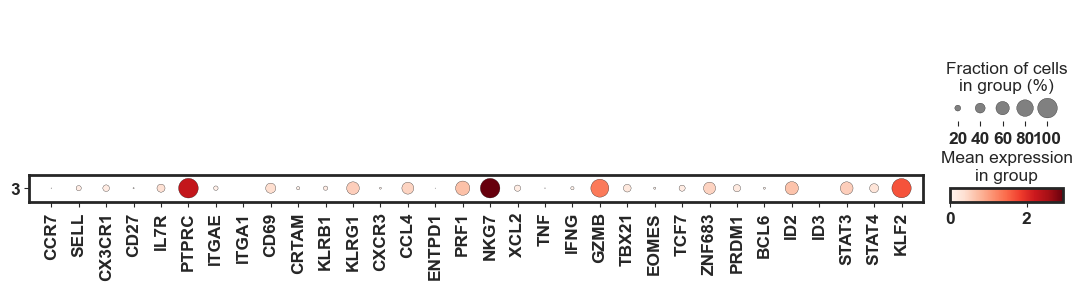

In [529]:
#plt.rcParams.update({'font.size': 15, 'font.weight': 'heavy','axes.linewidth':2})
#plt.rcParams.update(plt.rcParamsDefault)


sc.pl.dotplot(cluster_3,['CCR7','SELL','CX3CR1',
                               'CD27','IL7R','PTPRC','ITGAE','ITGA1','CD69','CRTAM',
                               'KLRB1','KLRG1','CXCR3','CCL4',
                               'ENTPD1','PRF1','NKG7','XCL2','TNF','IFNG','GZMB','TBX21','EOMES','TCF7',
                               'ZNF683','PRDM1','BCL6',
                               'ID2','ID3','STAT3','STAT4','KLF2'],groupby = 'leiden' ,  
              swap_axes = False,dot_min = 0, save= 'memories.png')

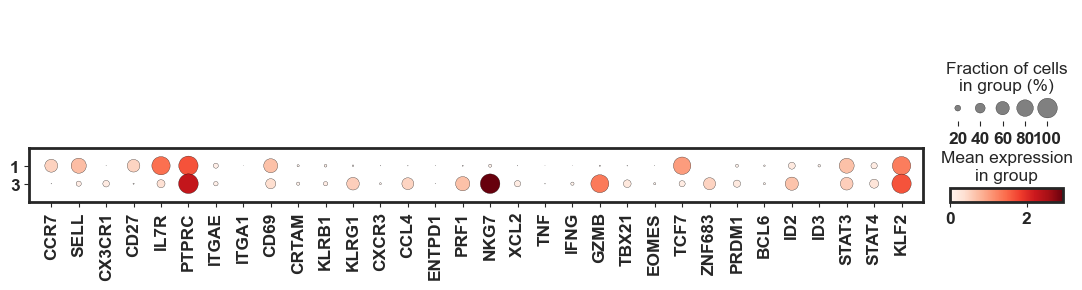

In [615]:
plt.rcParams.update({'font.size': 15, 'font.weight': 'heavy','axes.linewidth':2})
#plt.rcParams.update(plt.rcParamsDefault)


sc.pl.dotplot(adata_concat[adata_concat.obs['leiden'].isin(['1','3']),:],['CCR7','SELL','CX3CR1',
                               'CD27','IL7R','PTPRC','ITGAE','ITGA1','CD69','CRTAM',
                               'KLRB1','KLRG1','CXCR3','CCL4',
                               'ENTPD1','PRF1','NKG7','XCL2','TNF','IFNG','GZMB','TBX21','EOMES','TCF7',
                               'ZNF683','PRDM1','BCL6',
                               'ID2','ID3','STAT3','STAT4','KLF2'],groupby = 'leiden' ,  
              swap_axes = False,dot_min = 0, save= 'traintest_exp.png')

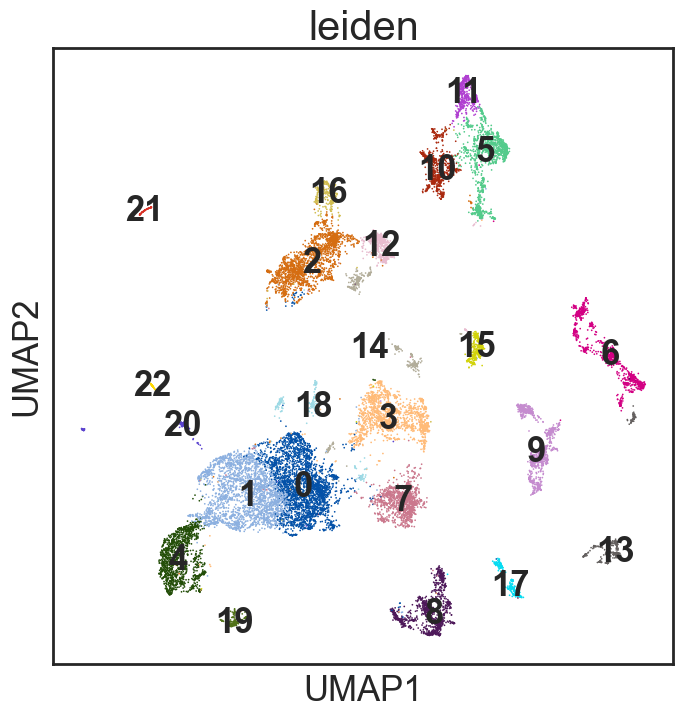

In [619]:
plt.rcParams.update({'font.size': 25, 'font.weight': 'heavy','axes.linewidth':2})
sc.pl.umap(adata_unseen, color = ['leiden'],legend_loc= 'on data',cmap = my_cmap, save = 'UScluster.png')

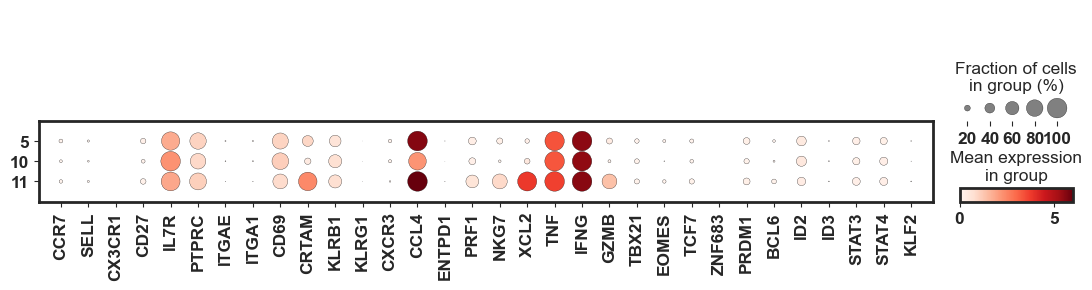

In [609]:
plt.rcParams.update({'font.size': 15, 'font.weight': 'heavy','axes.linewidth':2})
#plt.rcParams.update(plt.rcParamsDefault)


sc.pl.dotplot(adata_unseen[adata_unseen.obs['leiden'].isin(['5','10','11']),:],['CCR7','SELL','CX3CR1',
                               'CD27','IL7R','PTPRC','ITGAE','ITGA1','CD69','CRTAM',
                               'KLRB1','KLRG1','CXCR3','CCL4',
                               'ENTPD1','PRF1','NKG7','XCL2','TNF','IFNG','GZMB','TBX21','EOMES','TCF7',
                               'ZNF683','PRDM1','BCL6',
                               'ID2','ID3','STAT3','STAT4','KLF2'],groupby = 'leiden' ,
              swap_axes = False,dot_min = 0, save= 'unseen_memories.png')

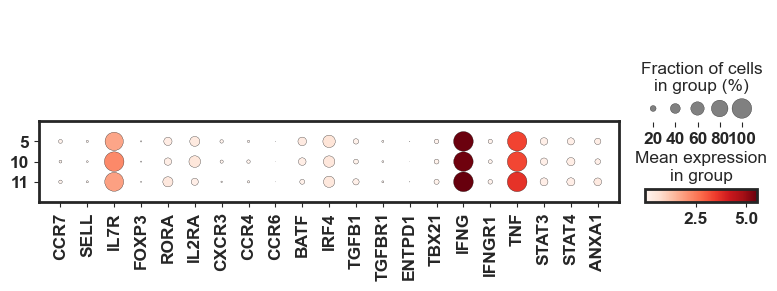

In [588]:
#plt.rcParams.update({'font.size': 15, 'font.weight': 'heavy','axes.linewidth':2})
#plt.rcParams.update(plt.rcParamsDefault)

sc.pl.dotplot(adata_unseen[adata_unseen.obs['leiden'].isin(['5','10','11']),:],['CCR7','SELL','IL7R','FOXP3','RORA','IL2RA','CXCR3','CCR4','CCR6','BATF',
                     'IRF4','TGFB1','TGFBR1','ENTPD1','TBX21','IFNG','IFNGR1','TNF',
                     'STAT3','STAT4','ANXA1'],groupby = 'leiden' , 
              swap_axes = False,dot_min = 0, save= 'unseen_cd4s.png')